In [1]:
import numpy as np
import random
from random import sample
import scipy as sp
from scipy.stats import qmc
import matplotlib.pyplot as plt

In [2]:
def mandelbrot(c,max_iters):
    counter=0
    threshold=2
    Z_now=complex(0,0)
    while(counter<max_iters):
        Z_next=pow(Z_now,2)+c
        if(abs(Z_next)>threshold):
            return counter
        Z_now=Z_next
        counter+=1
    return max_iters

In [3]:
def point_counter(x,y,max_iters):
    '''
    Function to count number of points in the Mandelbrot Set
    '''
    counter=0
    for i,x_i in enumerate(x):
        c=complex(x_i,y[i])
        check=mandelbrot(c,max_iters)
        if check==max_iters : counter+=1
    return counter


In [4]:
def PR_area_estimate(x_range, y_range, max_iters, num_samples):
    '''
    Estimates area of Mandelbrot set using Monte Carlo method
    '''
    x_samples = np.random.uniform(x_range[0], x_range[1], num_samples)
    y_samples = np.random.uniform(y_range[0], y_range[1], num_samples)
    mandelbrot_count = point_counter(x_samples, y_samples, max_iters)
    total_area = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
    estimated_area = total_area * mandelbrot_count / num_samples
    return estimated_area

In [5]:
def LHS_area_estimate(x_range, y_range, max_iters, num_samples):
    '''
    Estimates area of Mandelbrot set using Latin Hypercube methhod
    '''
    sample_set = qmc.LatinHypercube(d=2)
    sample = sample_set.random(n=num_samples)
    x_samples = x_range[0] + sample[:, 0] * (x_range[1] - x_range[0])
    y_samples = y_range[0] + sample[:, 1] * (y_range[1] - y_range[0])
    mandelbrot_count = point_counter(x_samples, y_samples, max_iters)
    total_area = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
    estimated_area = total_area * mandelbrot_count / num_samples
    
    return estimated_area

In [17]:
def ortho_area_estimate(x_range, y_range, max_iters, num_samples): 
    sample_size = int(np.sqrt(num_samples))
    
    sample_set = qmc.LatinHypercube(d=2)
    sample = sample_set.random(n=num_samples)

    x_size = np.linspace(x_range[0], x_range[1], sample_size + 1)
    y_size = np.linspace(y_range[0], y_range[1], sample_size + 1)

    x_samples = []
    y_samples = []

    for i in range(sample_size):
        for j in range(sample_size):
            # For each grid square, sample a random point within that section
            x_sample = np.random.uniform(x_size[i], x_size[i+1])
            y_sample = np.random.uniform(y_size[j], y_size[j+1])
            x_samples.append(x_sample)
            y_samples.append(y_sample)

    x_samples = np.array(x_samples)
    y_samples = np.array(y_samples)

    mandelbrot_count = point_counter(x_samples, y_samples, max_iters)
    total_area = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
    estimated_area = total_area * mandelbrot_count / num_samples
    
    return estimated_area




In [7]:
def create_grid(x,y,max_iters):
    X,Y=np.meshgrid(x,y)
    C=np.vectorize(complex)(X,Y) 
    Z=[]
    for row in C: 
        Z_row=[]  
        for c in row: 
            Z_row.append(mandelbrot(c,max_iters))
        Z.append(Z_row) 
    Z=np.array(Z)
    return Z


In [8]:
def plot_fractal(Z,x1,x2,y1,y2):
    plt.figure(figsize=(10,7))
    plt.imshow(Z,extent=(x1,x2,y1,y2),cmap='Blues_r',interpolation='bilinear')
    plt.colorbar(label='Iterations to escape')
    plt.title('Mandelbrot Set')
    plt.xlabel('Re(c)')
    plt.ylabel('Im(c)')
    plt.show()



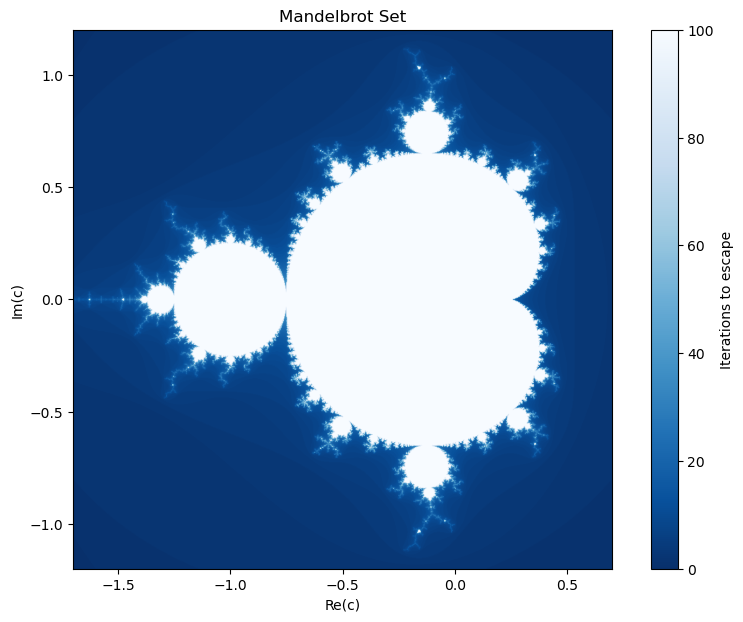

In [9]:
max_iters=100
n=1000
x=np.linspace(-1.7,0.7,n)  
y=np.linspace(-1.2,1.2,n)
plot_fractal(create_grid(x,y,max_iters),min(x),max(x),min(y),max(y))


In [ ]:
def plot_areas(x_range, y_range, max_iters_list, n_list, sample_type):
    # Initialize library for area results
    area_results = {} 
    variance_results = {} 

    for max_iters in max_iters_list: 
        # Initialize areas list and average area 
        areas = []
        average_area = 0

        for n in n_list: 
            # Calculates each estimated area for all samples and iterations
            if sample_type=="Pure Random":
                est_area = PR_area_estimate(x_range, y_range, max_iters, n)
            elif sample_type=="Latin Hypercube":
                est_area = LHS_area_estimate(x_range, y_range, max_iters, n)
            else: 
                est_area = ortho_area_estimate(x_range, y_range, max_iters, n)
            areas.append(est_area)
        area_results[max_iters] = areas

        # Calculates variance for each iteration (degrees of freedom = 1)
        variance_results[max_iters] = np.var(areas, ddof=1) 

        # Calculates average area over all simulations and iterations 
        average_area = np.mean(areas) 

    # Plot iterations 
    plt.figure(figsize=(10, 5))
    
    for max_iters, areas in area_results.items():
        plt.plot(n_list, areas, label=f"max_iters = {max_iters}", linestyle='-')

    # Plot average line of all samples for each iteration 
    plt.axhline(y=average_area, linestyle="--", label=f'Average Area (approx. {average_area})', color="black")

    # Prints variances for each max iteration value
    print("Variance of estimated areas for each max_iters:")
    for max_iters, variance in variance_results.items():
        print(f"max_iters = {max_iters}: Variance = {variance}")

    # Set up plots
    plt.title(f'Convergence of Mandelbrot Set Area Estimate; Sampling Method: {sample_type}')
    plt.xlabel("Number of Samples")
    plt.ylabel("Estimated Area")
    plt.legend()
    plt.grid()
    plt.show()

Variance of estimated areas for each max_iters:
max_iters = 50: Variance = 0.0016824750761187763
max_iters = 100: Variance = 0.0005489521173946168
max_iters = 200: Variance = 0.00038791918160612686
max_iters = 500: Variance = 0.00043703203172121914
max_iters = 1000: Variance = 0.0033229107171744957


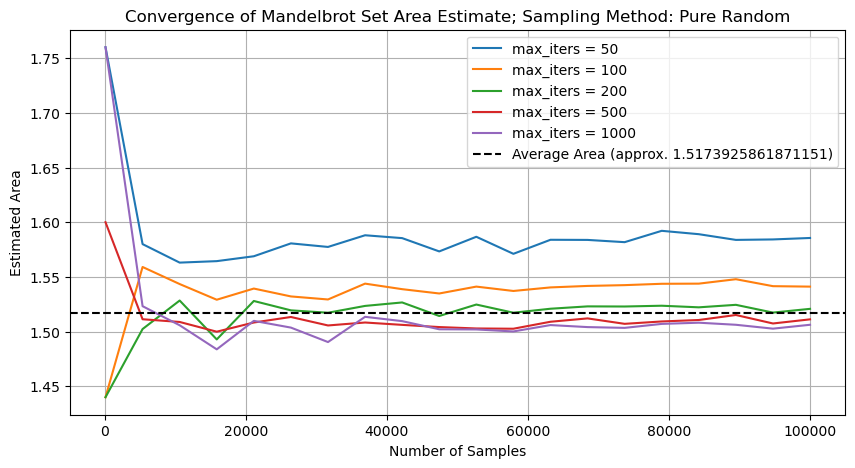

In [19]:
# Setting initial conditions 
x_range = (-2,2)
y_range = (-2,2)
max_iters_list = [50, 100, 200, 500, 1000]
n_list = np.linspace(100, 100000, 20, dtype=int)

plot_areas(x_range, y_range, max_iters_list, n_list, sample_type="Pure Random")

Variance of estimated areas for each max_iters:
max_iters = 50: Variance = 0.004634269518280115
max_iters = 100: Variance = 0.007248721382108928
max_iters = 200: Variance = 0.007997092970971518
max_iters = 500: Variance = 0.0026206793437599444
max_iters = 1000: Variance = 0.0005346711044884905


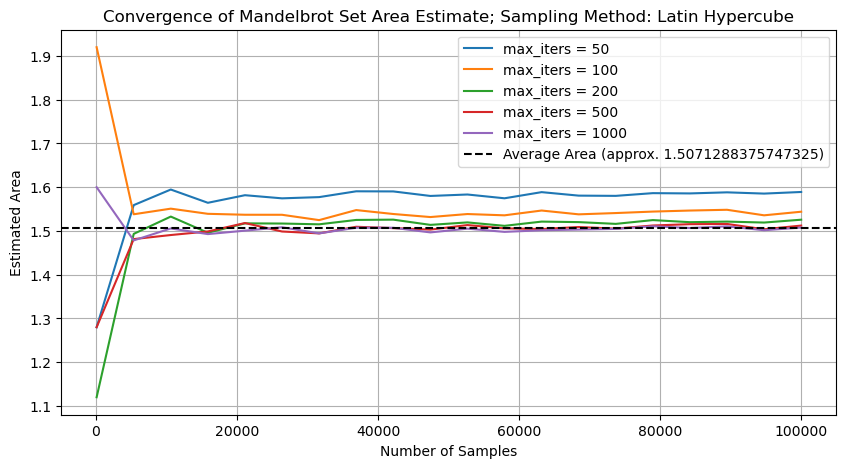

In [20]:
plot_areas(x_range, y_range, max_iters_list, n_list, sample_type="Latin Hypercube")

Variance of estimated areas for each max_iters:
max_iters = 50: Variance = 0.012524838491577131
max_iters = 100: Variance = 0.002448478036971306
max_iters = 200: Variance = 0.0003666102682679044
max_iters = 500: Variance = 0.0002709763766929416
max_iters = 1000: Variance = 0.007467489607471825


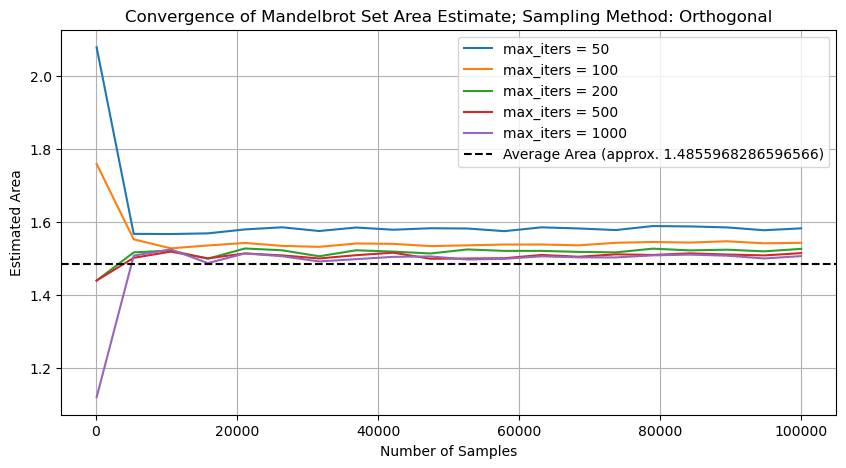

In [18]:
plot_areas(x_range, y_range, max_iters_list, n_list, sample_type="Orthogonal")